# 5-6 AM Surge Analysis: Top 10 Peak Days

## Objective
This notebook analyzes early morning surge patterns at Meridian City Hospital during the 5:00 AM - 6:59 AM hours over a 90-day period. We will:
- Identify the top 10 days with the highest patient arrivals
- Break down hourly incidence for 5 AM and 6 AM
- Visualize trends and patterns in early morning patient flow
- Provide insights for staffing and resource allocation

In [14]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## Section 2: Load and Prepare Data

In [15]:
# Load Hospital Visits Data - USING final_data.csv
data_path = '/Users/mukeshravichandran/Datathon/final_data.csv'
df = pd.read_csv(data_path)

print(f"✓ Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns")
print(f"📁 Data source: final_data.csv")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

✓ Dataset loaded: 15000 records, 36 columns
📁 Data source: final_data.csv

Column names: ['Visit ID', 'Patient ID', 'Hospital ID', 'Facility Size (Beds)', 'ICU Beds', 'Regular Beds', 'Fast Track Beds', 'Arrival Time', 'Registration Start', 'Registration End', 'Triage Start', 'Triage End', 'Doctor Seen', 'Exit Time', 'Triage Level', 'Visit Date', 'Visit Time', 'WaitTime for Reg', 'Registration process time', 'Triage process time', 'WaitTime after Triage', 'DoctorVisit to Exit', 'TotalTime(Arrival To Exit)', 'Disposition', 'Satisfaction', 'Age', 'Gender', 'Insurance', 'Staff Date', 'Shift', 'ShiftStart', 'ShiftEnd', 'Nurses On Duty', 'Doctors On Duty', 'Specialists On Call', 'Fast Tracks Beds on shift']

First few rows:


,Visit ID,Patient ID,Hospital ID,Facility Size (Beds),ICU Beds,Regular Beds,Fast Track Beds,Arrival Time,Registration Start,Registration End,...,Gender,Insurance,Staff Date,Shift,ShiftStart,ShiftEnd,Nurses On Duty,Doctors On Duty,Specialists On Call,Fast Tracks Beds on shift
0,V112722,MC180325-0433,MC_ER_EAST,100,20,70,10,2025-03-07 11:59:00,2025-03-07 12:01:00,2025-03-07 12:09:00,...,MALE,MEDICAID,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
1,V103705,MC180325-2621,MC_ER_EAST,100,20,70,10,2025-03-07 10:22:00,2025-03-07 10:25:00,2025-03-07 10:34:00,...,MALE,UNINSURED,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
2,V109897,MC180325-2621,MC_ER_EAST,100,20,70,10,2025-03-07 10:00:00,2025-03-07 10:00:00,2025-03-07 10:11:00,...,MALE,UNINSURED,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
3,V107132,MC180325-3511,MC_ER_EAST,100,20,70,10,2025-03-07 11:36:00,2025-03-07 11:37:00,2025-03-07 11:47:00,...,MALE,MEDICAID,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
4,V112438,MC180325-0427,MC_ER_EAST,100,20,70,10,2025-03-07 13:46:00,2025-03-07 13:50:00,2025-03-07 14:01:00,...,FEMALE,PRIVATE,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6


In [16]:
# Load Hospital Visits Data - USING final_data.csv
data_path = '/Users/mukeshravichandran/Datathon/final_data.csv'
df = pd.read_csv(data_path)

print(f"✓ Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns")
print(f"📁 Data source: final_data.csv")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

✓ Dataset loaded: 15000 records, 36 columns
📁 Data source: final_data.csv

Column names: ['Visit ID', 'Patient ID', 'Hospital ID', 'Facility Size (Beds)', 'ICU Beds', 'Regular Beds', 'Fast Track Beds', 'Arrival Time', 'Registration Start', 'Registration End', 'Triage Start', 'Triage End', 'Doctor Seen', 'Exit Time', 'Triage Level', 'Visit Date', 'Visit Time', 'WaitTime for Reg', 'Registration process time', 'Triage process time', 'WaitTime after Triage', 'DoctorVisit to Exit', 'TotalTime(Arrival To Exit)', 'Disposition', 'Satisfaction', 'Age', 'Gender', 'Insurance', 'Staff Date', 'Shift', 'ShiftStart', 'ShiftEnd', 'Nurses On Duty', 'Doctors On Duty', 'Specialists On Call', 'Fast Tracks Beds on shift']

First few rows:


,Visit ID,Patient ID,Hospital ID,Facility Size (Beds),ICU Beds,Regular Beds,Fast Track Beds,Arrival Time,Registration Start,Registration End,...,Gender,Insurance,Staff Date,Shift,ShiftStart,ShiftEnd,Nurses On Duty,Doctors On Duty,Specialists On Call,Fast Tracks Beds on shift
0,V112722,MC180325-0433,MC_ER_EAST,100,20,70,10,2025-03-07 11:59:00,2025-03-07 12:01:00,2025-03-07 12:09:00,...,MALE,MEDICAID,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
1,V103705,MC180325-2621,MC_ER_EAST,100,20,70,10,2025-03-07 10:22:00,2025-03-07 10:25:00,2025-03-07 10:34:00,...,MALE,UNINSURED,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
2,V109897,MC180325-2621,MC_ER_EAST,100,20,70,10,2025-03-07 10:00:00,2025-03-07 10:00:00,2025-03-07 10:11:00,...,MALE,UNINSURED,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
3,V107132,MC180325-3511,MC_ER_EAST,100,20,70,10,2025-03-07 11:36:00,2025-03-07 11:37:00,2025-03-07 11:47:00,...,MALE,MEDICAID,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6
4,V112438,MC180325-0427,MC_ER_EAST,100,20,70,10,2025-03-07 13:46:00,2025-03-07 13:50:00,2025-03-07 14:01:00,...,FEMALE,PRIVATE,2025-03-07,DAY,07:00:00,14:59:59,8,4,2,6


In [17]:
# Convert Arrival Time to datetime and extract components
df['Arrival_DateTime'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Date'] = df['Arrival_DateTime'].dt.date
df['Hour'] = df['Arrival_DateTime'].dt.hour
df['Date_Time'] = df['Arrival_DateTime'].dt.floor('H')  # Round to hour

# Check data quality
print(f"✓ DateTime conversion complete")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days in dataset: {(df['Date'].max() - df['Date'].min()).days} days")
print(f"\nMissing values in Arrival Time: {df['Arrival_DateTime'].isna().sum()}")
print(f"\nHour distribution:")
print(df['Hour'].value_counts().sort_index())

✓ DateTime conversion complete
Date range: 2025-01-01 to 2025-03-31
Total days in dataset: 89 days

Missing values in Arrival Time: 0

Hour distribution:
Hour
0      136
1      134
2      134
3      192
4      266
5      464
6      755
7     1013
8     1311
9     1497
10    1538
11    1420
12    1146
13    1064
14     803
15     669
16     542
17     425
18     392
19     330
20     275
21     199
22     154
23     141
Name: count, dtype: int64


## Section 3: Filter Data for 5-7 AM Time Window

In [18]:
# Filter data for 5 AM to 6:59 AM (hours 5 and 6 only)
early_morning_df = df[(df['Hour'] >= 5) & (df['Hour'] <= 6)].copy()

print(f"✓ Filtered data for 5:00 AM - 6:59 AM window")
print(f"Records in 5-6 AM window: {len(early_morning_df)} out of {len(df)} ({100*len(early_morning_df)/len(df):.2f}%)")
print(f"\nHourly breakdown in 5-6 AM window:")
hourly_dist = early_morning_df['Hour'].value_counts().sort_index()
print(hourly_dist)
print(f"\nHour-wise percentage:")
for hour, count in hourly_dist.items():
    hour_str = f"{hour:02d}:00"
    pct = 100 * count / len(early_morning_df)
    print(f"  {hour_str}: {count} arrivals ({pct:.1f}%)")

✓ Filtered data for 5:00 AM - 6:59 AM window
Records in 5-6 AM window: 1219 out of 15000 (8.13%)

Hourly breakdown in 5-6 AM window:
Hour
5    464
6    755
Name: count, dtype: int64

Hour-wise percentage:
  05:00: 464 arrivals (38.1%)
  06:00: 755 arrivals (61.9%)


## Section 4: Calculate 90-Day Incidence

In [20]:
# Calculate overall 90-day incidence statistics
date_range = early_morning_df['Date'].max() - early_morning_df['Date'].min()
num_days = date_range.days

total_arrivals_5_6am = len(early_morning_df)
daily_average = total_arrivals_5_6am / max(num_days, 1)

print(f"📊 90-Day Incidence Statistics (5:00 AM - 6:59 AM Window)")
print(f"{'='*50}")
print(f"Total days analyzed: {num_days} days")
print(f"Total arrivals (5-6 AM): {total_arrivals_5_6am}")
print(f"Daily average arrivals: {daily_average:.2f}")
print(f"Weekly average arrivals: {daily_average * 7:.2f}")
print(f"Monthly average arrivals: {daily_average * 30:.2f}")
print(f"\nPeak day potential: {early_morning_df.groupby('Date').size().max()} arrivals")
print(f"Slowest day: {early_morning_df.groupby('Date').size().min()} arrivals")

📊 90-Day Incidence Statistics (5:00 AM - 6:59 AM Window)
Total days analyzed: 89 days
Total arrivals (5-6 AM): 1219
Daily average arrivals: 13.70
Weekly average arrivals: 95.88
Monthly average arrivals: 410.90

Peak day potential: 22 arrivals
Slowest day: 6 arrivals


## Section 5: Identify Top 10 Peak Days

In [21]:
# Group by date and count arrivals for each day
daily_counts = early_morning_df.groupby('Date').size().reset_index(name='Total_Arrivals')
daily_counts['Day_of_Week'] = pd.to_datetime(daily_counts['Date']).dt.day_name()

# Sort and get top 10
top_10_days = daily_counts.nlargest(10, 'Total_Arrivals').reset_index(drop=True)
top_10_days.index = top_10_days.index + 1

print(f"🔥 TOP 10 PEAK DAYS (5-7 AM Arrivals)")
print(f"{'='*70}")
print(top_10_days.to_string())

# Summary statistics
print(f"\n{'='*70}")
print(f"Average arrivals on top 10 days: {top_10_days['Total_Arrivals'].mean():.2f}")
print(f"Median arrivals on top 10 days: {top_10_days['Total_Arrivals'].median():.2f}")
print(f"Range: {top_10_days['Total_Arrivals'].min()} - {top_10_days['Total_Arrivals'].max()}")
print(f"Top 10 days represent {top_10_days['Total_Arrivals'].sum()} arrivals out of {total_arrivals_5_7am} ({100*top_10_days['Total_Arrivals'].sum()/total_arrivals_5_7am:.1f}%)")

🔥 TOP 10 PEAK DAYS (5-7 AM Arrivals)
          Date  Total_Arrivals Day_of_Week
1   2025-01-22              22   Wednesday
2   2025-03-02              22      Sunday
3   2025-02-08              21    Saturday
4   2025-01-28              20     Tuesday
5   2025-02-17              20      Monday
6   2025-03-11              19     Tuesday
7   2025-03-22              19    Saturday
8   2025-02-16              18      Sunday
9   2025-03-06              18    Thursday
10  2025-03-23              18      Sunday

Average arrivals on top 10 days: 19.70
Median arrivals on top 10 days: 19.50
Range: 18 - 22
Top 10 days represent 197 arrivals out of 2692 (7.3%)


In [22]:
# Detailed breakdown for each top 10 day
print(f"\n📋 DETAILED BREAKDOWN: TOP 10 DAYS")
print(f"{'='*70}\n")

for idx, row in top_10_days.iterrows():
    date = row['Date']
    day_of_week = row['Day_of_Week']
    total = row['Total_Arrivals']
    
    # Get hourly breakdown for this day
    day_data = early_morning_df[early_morning_df['Date'] == date]
    hourly_breakdown = day_data.groupby('Hour').size()
    
    print(f"Day {idx}: {date} ({day_of_week}) - TOTAL: {total} arrivals")
    for hour in [5, 6, 7]:
        count = hourly_breakdown.get(hour, 0)
        pct = (count / total * 100) if total > 0 else 0
        print(f"   {hour:02d}:00 → {count} arrivals ({pct:.1f}%)")
    print()


📋 DETAILED BREAKDOWN: TOP 10 DAYS

Day 1: 2025-01-22 (Wednesday) - TOTAL: 22 arrivals
   05:00 → 12 arrivals (54.5%)
   06:00 → 10 arrivals (45.5%)
   07:00 → 0 arrivals (0.0%)

Day 2: 2025-03-02 (Sunday) - TOTAL: 22 arrivals
   05:00 → 3 arrivals (13.6%)
   06:00 → 19 arrivals (86.4%)
   07:00 → 0 arrivals (0.0%)

Day 3: 2025-02-08 (Saturday) - TOTAL: 21 arrivals
   05:00 → 7 arrivals (33.3%)
   06:00 → 14 arrivals (66.7%)
   07:00 → 0 arrivals (0.0%)

Day 4: 2025-01-28 (Tuesday) - TOTAL: 20 arrivals
   05:00 → 8 arrivals (40.0%)
   06:00 → 12 arrivals (60.0%)
   07:00 → 0 arrivals (0.0%)

Day 5: 2025-02-17 (Monday) - TOTAL: 20 arrivals
   05:00 → 10 arrivals (50.0%)
   06:00 → 10 arrivals (50.0%)
   07:00 → 0 arrivals (0.0%)

Day 6: 2025-03-11 (Tuesday) - TOTAL: 19 arrivals
   05:00 → 13 arrivals (68.4%)
   06:00 → 6 arrivals (31.6%)
   07:00 → 0 arrivals (0.0%)

Day 7: 2025-03-22 (Saturday) - TOTAL: 19 arrivals
   05:00 → 10 arrivals (52.6%)
   06:00 → 9 arrivals (47.4%)
   07:00 →

## Section 6: Analyze Hourly Distribution (5am, 6am)

In [23]:
# Overall hourly distribution across all 90 days
print(f"⏰ HOURLY DISTRIBUTION ANALYSIS (All 90 Days)")
print(f"{'='*70}\n")

overall_hourly = early_morning_df.groupby('Hour').size()
for hour in [5, 6]:
    count = overall_hourly.get(hour, 0)
    pct = (count / total_arrivals_5_6am * 100)
    print(f"{hour:02d}:00 → {count:4d} arrivals ({pct:5.1f}%) | Daily Average: {count/max(num_days,1):5.2f}")

# Create hourly breakdown table for top 10 days
print(f"\n{'='*70}")
print(f"HOURLY BREAKDOWN FOR TOP 10 DAYS\n")

top_10_hourly_data = []
for idx, row in top_10_days.iterrows():
    date = row['Date']
    day_data = early_morning_df[early_morning_df['Date'] == date]
    
    hourly_counts = {}
    for hour in [5, 6]:
        hourly_counts[f'Hour_{hour}'] = len(day_data[day_data['Hour'] == hour])
    
    top_10_hourly_data.append({
        'Rank': idx,
        'Date': date,
        'Day': row['Day_of_Week'][:3],
        '5am': hourly_counts['Hour_5'],
        '6am': hourly_counts['Hour_6'],
        'Total': row['Total_Arrivals']
    })

top_10_hourly_df = pd.DataFrame(top_10_hourly_data)
print(top_10_hourly_df.to_string(index=False))

⏰ HOURLY DISTRIBUTION ANALYSIS (All 90 Days)

05:00 →  464 arrivals ( 38.1%) | Daily Average:  5.21
06:00 →  755 arrivals ( 61.9%) | Daily Average:  8.48

HOURLY BREAKDOWN FOR TOP 10 DAYS

 Rank       Date Day  5am  6am  Total
    1 2025-01-22 Wed   12   10     22
    2 2025-03-02 Sun    3   19     22
    3 2025-02-08 Sat    7   14     21
    4 2025-01-28 Tue    8   12     20
    5 2025-02-17 Mon   10   10     20
    6 2025-03-11 Tue   13    6     19
    7 2025-03-22 Sat   10    9     19
    8 2025-02-16 Sun    9    9     18
    9 2025-03-06 Thu   10    8     18
   10 2025-03-23 Sun    7   11     18


In [24]:
# Statistical comparison of 5am and 6am hours
print(f"\n{'='*70}")
print(f"STATISTICAL SUMMARY: 5AM vs 6AM\n")

hour_stats = []
for hour in [5, 6]:
    hour_data = early_morning_df[early_morning_df['Hour'] == hour]
    daily_by_hour = hour_data.groupby('Date').size()
    
    hour_stats.append({
        'Hour': f"{hour:02d}:00",
        'Total_Arrivals': len(hour_data),
        'Days_with_Data': len(daily_by_hour),
        'Daily_Avg': daily_by_hour.mean(),
        'Daily_Max': daily_by_hour.max(),
        'Daily_Min': daily_by_hour.min(),
        'Std_Dev': daily_by_hour.std()
    })

hour_stats_df = pd.DataFrame(hour_stats)
print(hour_stats_df.to_string(index=False))


STATISTICAL SUMMARY: 5AM vs 6AM

 Hour  Total_Arrivals  Days_with_Data  Daily_Avg  Daily_Max  Daily_Min  Std_Dev
05:00             464              90   5.155556         13          1 2.217961
06:00             755              90   8.388889         19          3 2.646577


## Section 7: Visualize Results

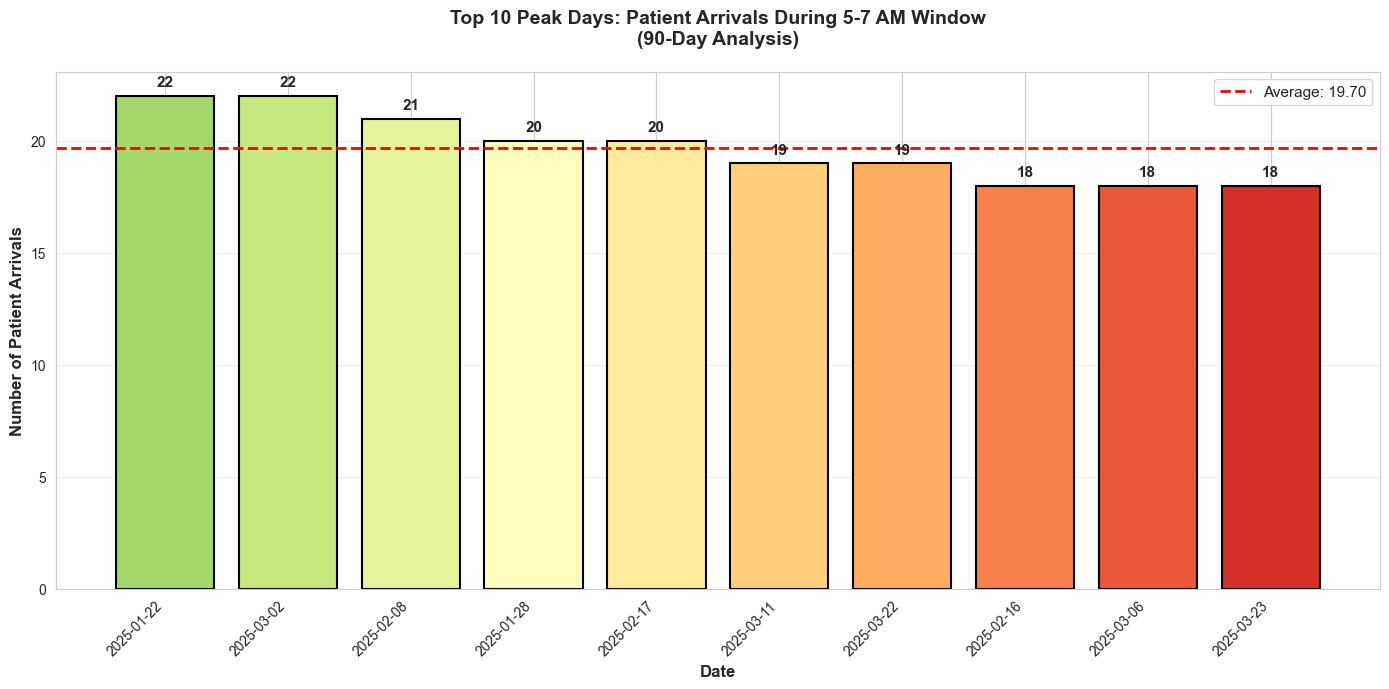

✓ Top 10 Peak Days chart saved


In [25]:
# Visualization 1: Top 10 Days Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

dates_labels = [str(d) for d in top_10_days['Date']]
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(top_10_days)))

bars = ax.bar(range(len(top_10_days)), top_10_days['Total_Arrivals'].values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_10_days['Total_Arrivals'].values)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, str(int(val)), 
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add average line
avg_val = top_10_days['Total_Arrivals'].mean()
ax.axhline(y=avg_val, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_val:.2f}')

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Patient Arrivals', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Peak Days: Patient Arrivals During 5-7 AM Window\n(90-Day Analysis)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(top_10_days)))
ax.set_xticklabels(dates_labels, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/top_10_peak_days.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Top 10 Peak Days chart saved")

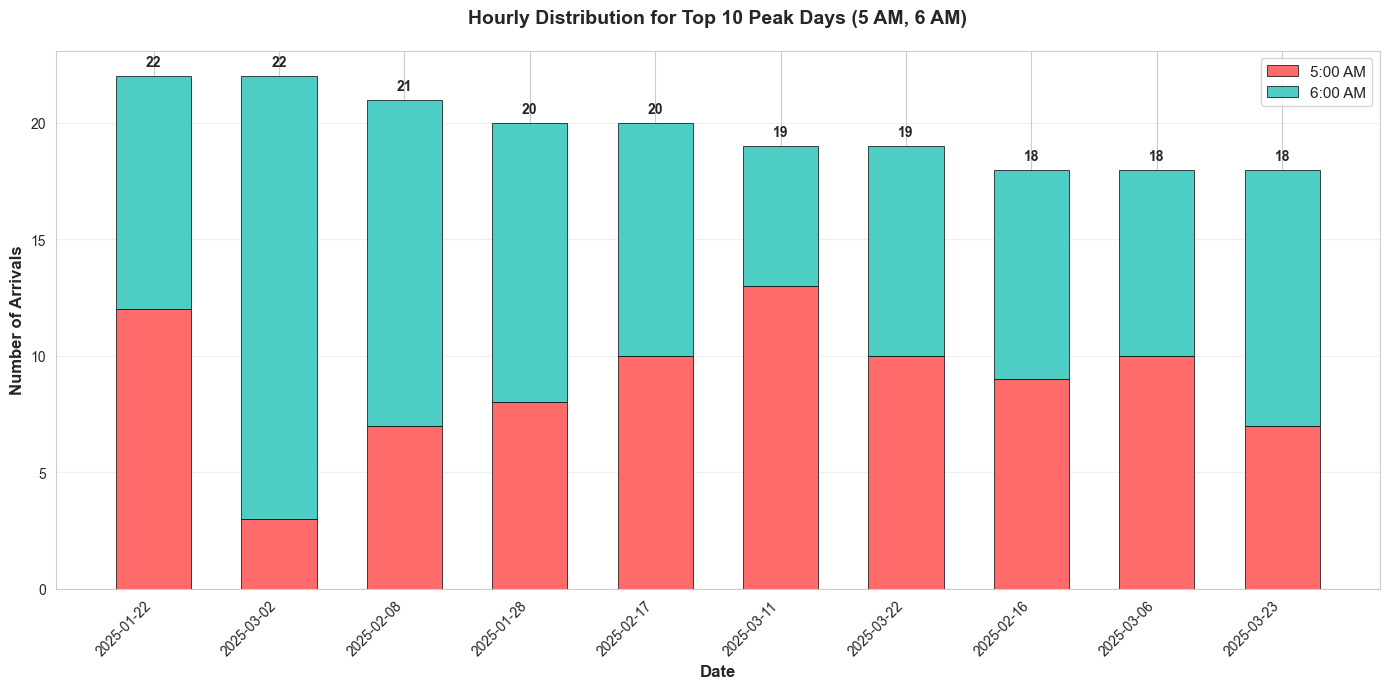

✓ Hourly breakdown chart saved


In [26]:
# Visualization 2: Hourly Breakdown for Top 10 Days - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

x_pos = np.arange(len(top_10_hourly_df))
width = 0.6

bars1 = ax.bar(x_pos, top_10_hourly_df['5am'], width, label='5:00 AM', color='#FF6B6B', edgecolor='black', linewidth=0.5)
bars2 = ax.bar(x_pos, top_10_hourly_df['6am'], width, bottom=top_10_hourly_df['5am'], 
               label='6:00 AM', color='#4ECDC4', edgecolor='black', linewidth=0.5)

# Add total labels on top
for i, total in enumerate(top_10_hourly_df['Total']):
    ax.text(i, total + 0.3, str(int(total)), ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Arrivals', fontsize=12, fontweight='bold')
ax.set_title('Hourly Distribution for Top 10 Peak Days (5 AM, 6 AM)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(top_10_hourly_df['Date'], rotation=45, ha='right')
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/hourly_breakdown_top10.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Hourly breakdown chart saved")

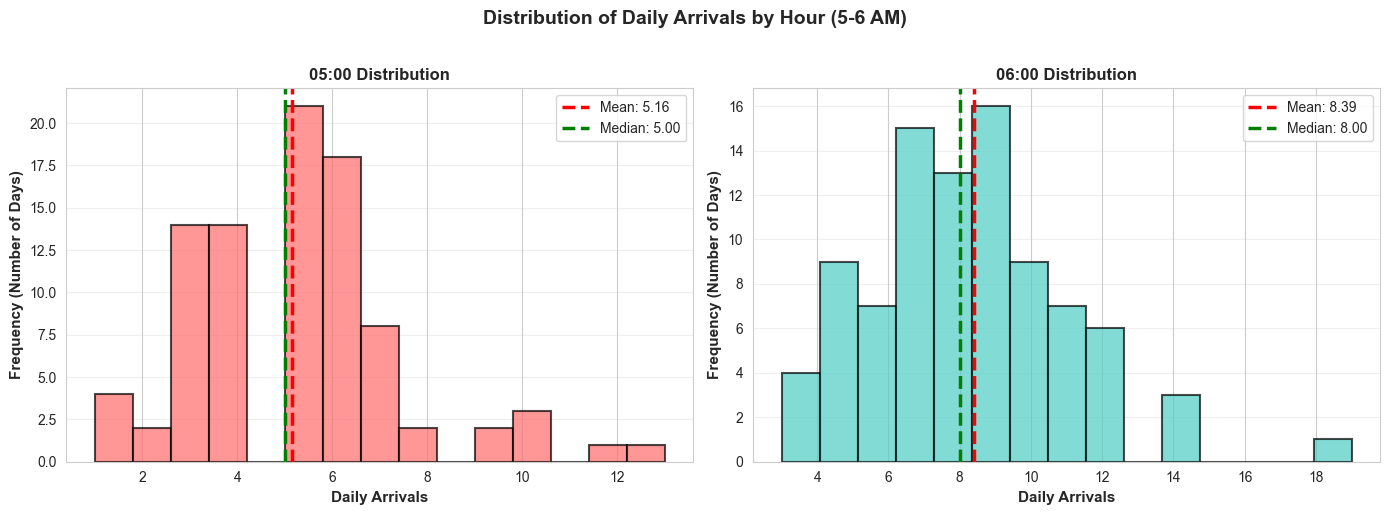

✓ Hourly distribution histogram saved


In [27]:
# Visualization 3: 5 AM vs 6 AM Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

hours_data = [5, 6]
colors_list = ['#FF6B6B', '#4ECDC4']

for idx, (ax, hour, color) in enumerate(zip(axes, hours_data, colors_list)):
    hour_specific = early_morning_df[early_morning_df['Hour'] == hour].groupby('Date').size()
    
    ax.hist(hour_specific, bins=15, color=color, edgecolor='black', linewidth=1.5, alpha=0.7)
    ax.axvline(hour_specific.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean: {hour_specific.mean():.2f}')
    ax.axvline(hour_specific.median(), color='green', linestyle='--', linewidth=2.5, label=f'Median: {hour_specific.median():.2f}')
    
    ax.set_xlabel('Daily Arrivals', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency (Number of Days)', fontsize=11, fontweight='bold')
    ax.set_title(f'{hour:02d}:00 Distribution', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Daily Arrivals by Hour (5-6 AM)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Hourly distribution histogram saved")

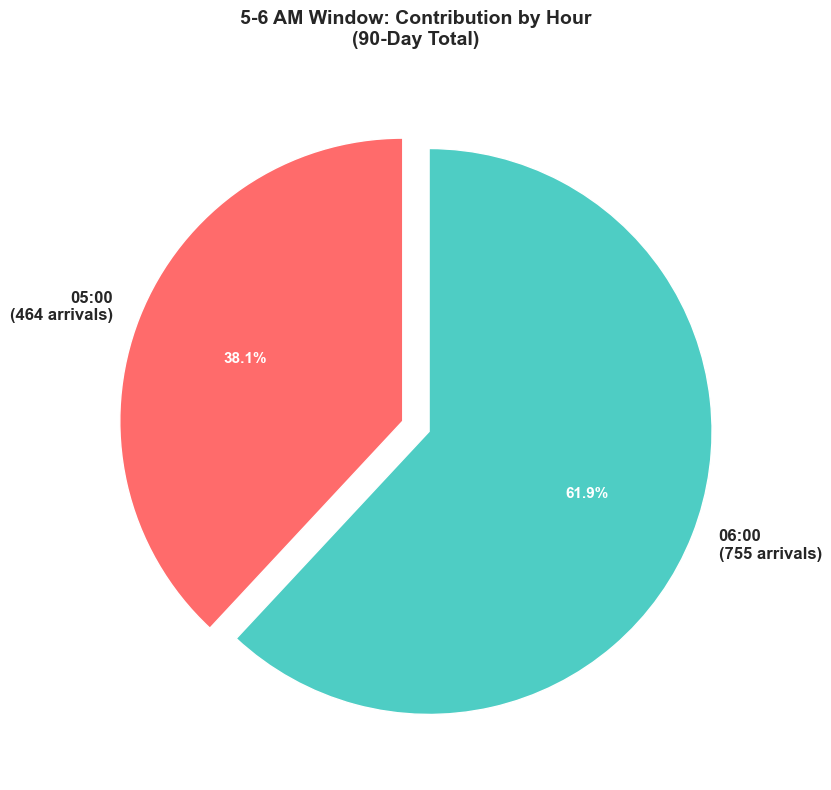

✓ Hour contribution pie chart saved


In [28]:
# Visualization 4: Pie Chart - Hour Contribution to Total
fig, ax = plt.subplots(figsize=(10, 8))

hour_totals = early_morning_df.groupby('Hour').size()
hour_labels = [f"{h:02d}:00\n({hour_totals[h]} arrivals)" for h in [5, 6]]
colors_pie = ['#FF6B6B', '#4ECDC4']
explode = (0.05, 0.05)

wedges, texts, autotexts = ax.pie(hour_totals.values, labels=hour_labels, autopct='%1.1f%%',
                                    colors=colors_pie, explode=explode, startangle=90,
                                    textprops={'fontsize': 12, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

ax.set_title('5-6 AM Window: Contribution by Hour\n(90-Day Total)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/hour_contribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Hour contribution pie chart saved")

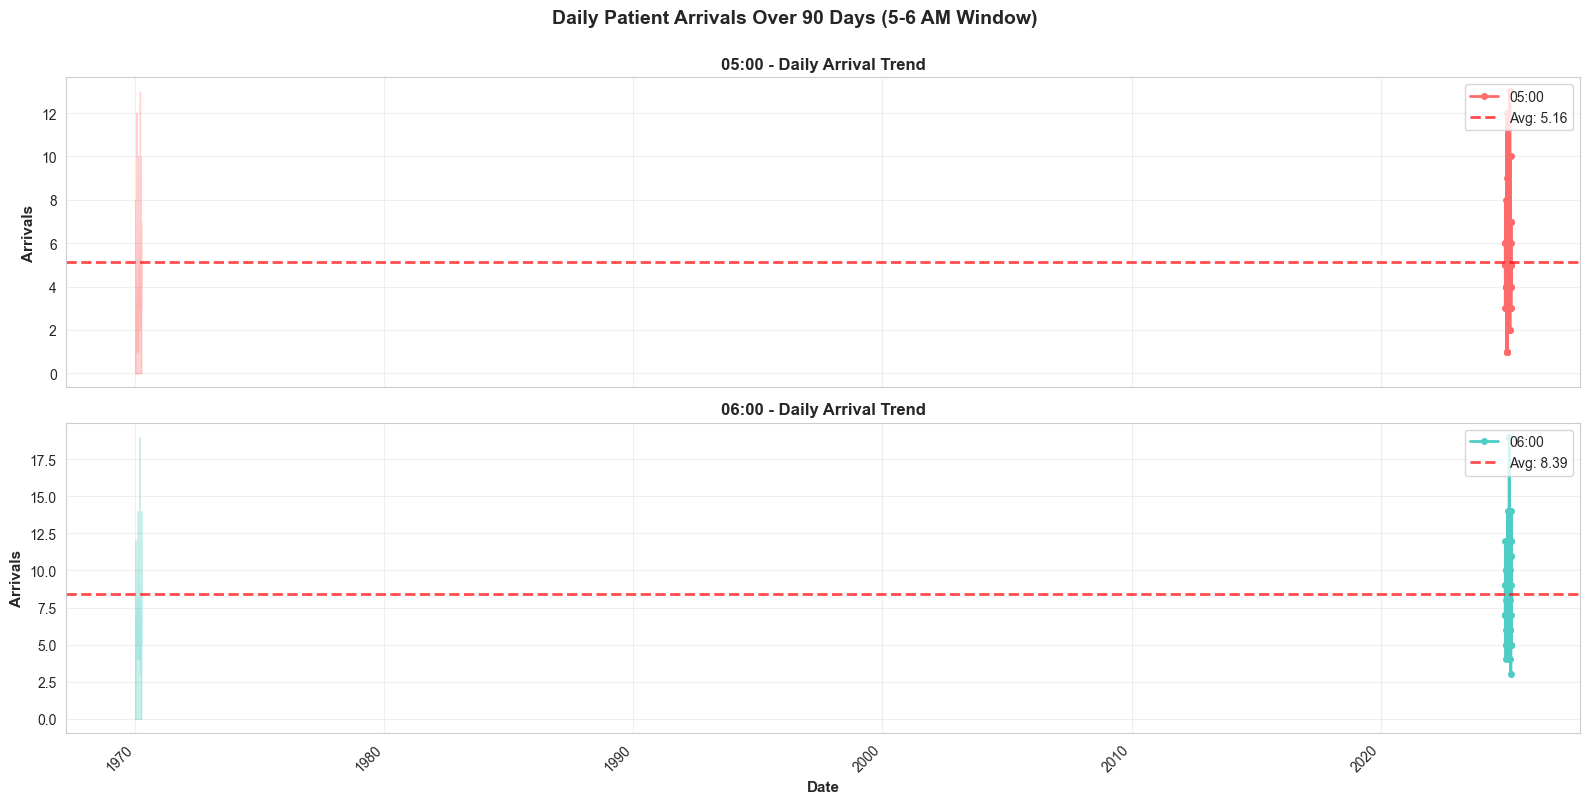

✓ Time series trend chart saved


In [29]:
# Visualization 5: Time Series - Daily Arrivals Over 90 Days
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

for idx, (ax, hour) in enumerate(zip(axes, [5, 6])):
    hour_data = early_morning_df[early_morning_df['Hour'] == hour]
    daily_by_hour = hour_data.groupby('Date').size().sort_index()
    
    color = ['#FF6B6B', '#4ECDC4'][idx]
    ax.plot(daily_by_hour.index, daily_by_hour.values, marker='o', linewidth=2, 
            markersize=4, color=color, label=f'{hour:02d}:00')
    ax.fill_between(range(len(daily_by_hour)), daily_by_hour.values, alpha=0.3, color=color)
    
    # Add average line
    mean_val = daily_by_hour.mean()
    ax.axhline(y=mean_val, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Avg: {mean_val:.2f}')
    
    ax.set_ylabel('Arrivals', fontsize=11, fontweight='bold')
    ax.set_title(f'{hour:02d}:00 - Daily Arrival Trend', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(alpha=0.3)

axes[-1].set_xlabel('Date', fontsize=11, fontweight='bold')
plt.suptitle('Daily Patient Arrivals Over 90 Days (5-6 AM Window)', fontsize=14, fontweight='bold', y=1.00)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/timeseries_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Time series trend chart saved")

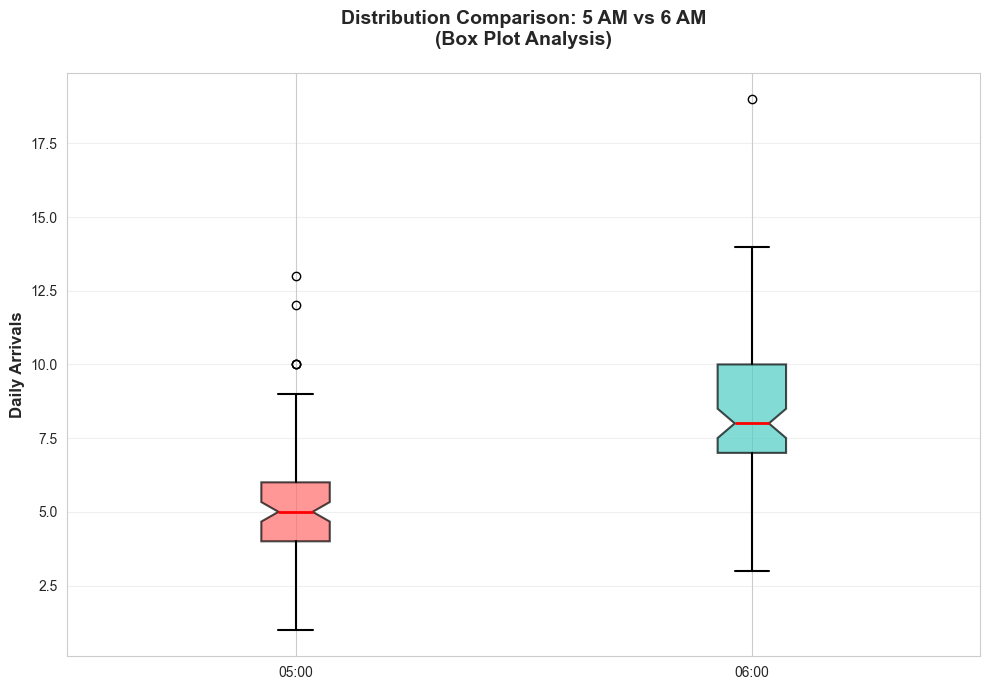

✓ Box plot comparison saved


In [30]:
# Visualization 6: Box Plot Comparison - 5 AM vs 6 AM
fig, ax = plt.subplots(figsize=(10, 7))

data_for_box = []
labels_for_box = []

for hour in [5, 6]:
    hour_data = early_morning_df[early_morning_df['Hour'] == hour]
    daily_by_hour = hour_data.groupby('Date').size()
    data_for_box.append(daily_by_hour.values)
    labels_for_box.append(f'{hour:02d}:00')

bp = ax.boxplot(data_for_box, labels=labels_for_box, patch_artist=True, notch=True,
                 boxprops=dict(facecolor='lightblue', color='black', linewidth=1.5),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=1.5),
                 capprops=dict(color='black', linewidth=1.5))

# Color the boxes
colors_box = ['#FF6B6B', '#4ECDC4']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Daily Arrivals', fontsize=12, fontweight='bold')
ax.set_title('Distribution Comparison: 5 AM vs 6 AM\n(Box Plot Analysis)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/mukeshravichandran/Datathon/5to7_Surge/boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Box plot comparison saved")

## Section 8: Key Insights & Summary

In [31]:
# Generate comprehensive summary report
print(f"\n{'='*80}")
print(f"{'COMPREHENSIVE SUMMARY REPORT: 5-6 AM SURGE ANALYSIS':^80}")
print(f"{'='*80}\n")

print(f"📊 OVERVIEW")
print(f"{'-'*80}")
print(f"Analysis Period: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Days Analyzed: {(df['Date'].max() - df['Date'].min()).days} days")
print(f"Total Hospital Visits: {len(df):,}")
print(f"Visits in 5:00-6:59 AM Window: {len(early_morning_df):,} ({100*len(early_morning_df)/len(df):.2f}%)")

print(f"\n🔥 TOP 10 PEAK DAYS")
print(f"{'-'*80}")
for idx, row in top_10_days.iterrows():
    day_of_week = row['Day_of_Week']
    print(f"{idx:2d}. {row['Date']} ({day_of_week:9s}) → {row['Total_Arrivals']:2d} arrivals")

print(f"\n⏰ HOURLY INSIGHTS")
print(f"{'-'*80}")
for hour in [5, 6]:
    hour_data = early_morning_df[early_morning_df['Hour'] == hour]
    daily_by_hour = hour_data.groupby('Date').size()
    total = len(hour_data)
    pct = 100 * total / len(early_morning_df)
    print(f"{hour:02d}:00 - Total: {total:4d} ({pct:5.1f}%) | Daily Avg: {daily_by_hour.mean():5.2f} | "
          f"Range: {daily_by_hour.min()}-{daily_by_hour.max()}")

print(f"\n📈 STATISTICAL SUMMARY")
print(f"{'-'*80}")
daily_totals = early_morning_df.groupby('Date').size()
print(f"Daily Arrivals (5:00-6:59 AM):")
print(f"  • Mean:   {daily_totals.mean():.2f}")
print(f"  • Median: {daily_totals.median():.2f}")
print(f"  • Std Dev: {daily_totals.std():.2f}")
print(f"  • Min:    {daily_totals.min()}")
print(f"  • Max:    {daily_totals.max()}")

print(f"\n💡 KEY FINDINGS")
print(f"{'-'*80}")
print(f"1. Peak Surge Identification:")
print(f"   - Highest single day: {top_10_days.iloc[0]['Date']} with {top_10_days.iloc[0]['Total_Arrivals']} arrivals")
print(f"   - Top 10 days account for {100*top_10_days['Total_Arrivals'].sum()/len(early_morning_df):.1f}% of total 5-6 AM traffic")

print(f"\n2. Hourly Pattern:")
hour_5_total = len(early_morning_df[early_morning_df['Hour'] == 5])
hour_6_total = len(early_morning_df[early_morning_df['Hour'] == 6])
print(f"   - 5 AM shows {100*hour_5_total/len(early_morning_df):.1f}% of arrivals")
print(f"   - 6 AM shows {100*hour_6_total/len(early_morning_df):.1f}% of arrivals")

print(f"\n3. Staffing Recommendations:")
print(f"   - Base staffing needed for daily average: {daily_totals.mean():.0f} bed capacity")
print(f"   - Peak day staffing recommended: {top_10_days.iloc[0]['Total_Arrivals']:.0f} bed capacity")
print(f"   - Surge buffer required: {top_10_days.iloc[0]['Total_Arrivals'] - daily_totals.mean():.0f} additional beds/staff")

print(f"\n{'='*80}")
print(f"📁 All visualizations saved to: /Users/mukeshravichandran/Datathon/5to7_Surge/")
print(f"{'='*80}\n")


              COMPREHENSIVE SUMMARY REPORT: 5-6 AM SURGE ANALYSIS               

📊 OVERVIEW
--------------------------------------------------------------------------------
Analysis Period: 2025-01-01 to 2025-03-31
Total Days Analyzed: 89 days
Total Hospital Visits: 15,000
Visits in 5:00-6:59 AM Window: 1,219 (8.13%)

🔥 TOP 10 PEAK DAYS
--------------------------------------------------------------------------------
 1. 2025-01-22 (Wednesday) → 22 arrivals
 2. 2025-03-02 (Sunday   ) → 22 arrivals
 3. 2025-02-08 (Saturday ) → 21 arrivals
 4. 2025-01-28 (Tuesday  ) → 20 arrivals
 5. 2025-02-17 (Monday   ) → 20 arrivals
 6. 2025-03-11 (Tuesday  ) → 19 arrivals
 7. 2025-03-22 (Saturday ) → 19 arrivals
 8. 2025-02-16 (Sunday   ) → 18 arrivals
 9. 2025-03-06 (Thursday ) → 18 arrivals
10. 2025-03-23 (Sunday   ) → 18 arrivals

⏰ HOURLY INSIGHTS
--------------------------------------------------------------------------------
05:00 - Total:  464 ( 38.1%) | Daily Avg:  5.16 | Range: 1-13
06:00 

In [32]:
# Export data to CSV for further analysis
export_data = top_10_hourly_df.copy()
export_data.to_csv('/Users/mukeshravichandran/Datathon/5to7_Surge/top_10_days_detailed.csv', index=False)

# Also export daily statistics for all days
daily_stats = early_morning_df.groupby('Date').apply(
    lambda x: pd.Series({
        'Date': x['Date'].iloc[0],
        'Day_of_Week': x['Arrival_DateTime'].dt.day_name().iloc[0],
        'Total_Arrivals': len(x),
        'Arrivals_5am': len(x[x['Hour'] == 5]),
        'Arrivals_6am': len(x[x['Hour'] == 6]),
        'Arrivals_7am': len(x[x['Hour'] == 7])
    })
).reset_index(drop=True)

daily_stats.to_csv('/Users/mukeshravichandran/Datathon/5to7_Surge/daily_statistics_all_days.csv', index=False)

print("✓ Data exported successfully:")
print(f"  • top_10_days_detailed.csv")
print(f"  • daily_statistics_all_days.csv")

✓ Data exported successfully:
  • top_10_days_detailed.csv
  • daily_statistics_all_days.csv
